In [2]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:

df.head()
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  HasCabin     889 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 93.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.419273
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
print("Mean Age:", df['Age'].mean())
print("Median Fare:", df['Fare'].median())
print("Std Dev Age:", df['Age'].std())


Mean Age: 29.315151856017994
Median Fare: 14.4542
Std Dev Age: 12.984932293690774


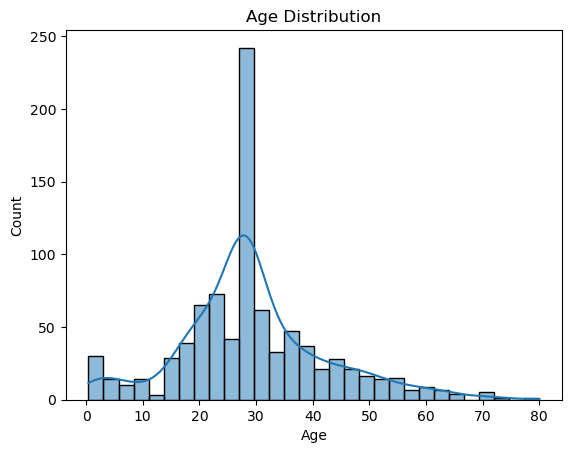

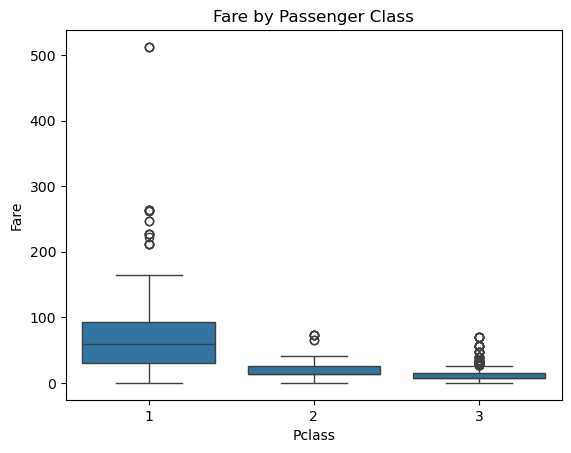

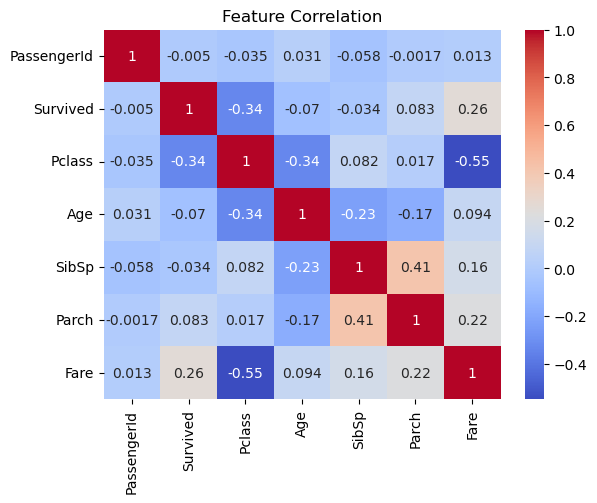

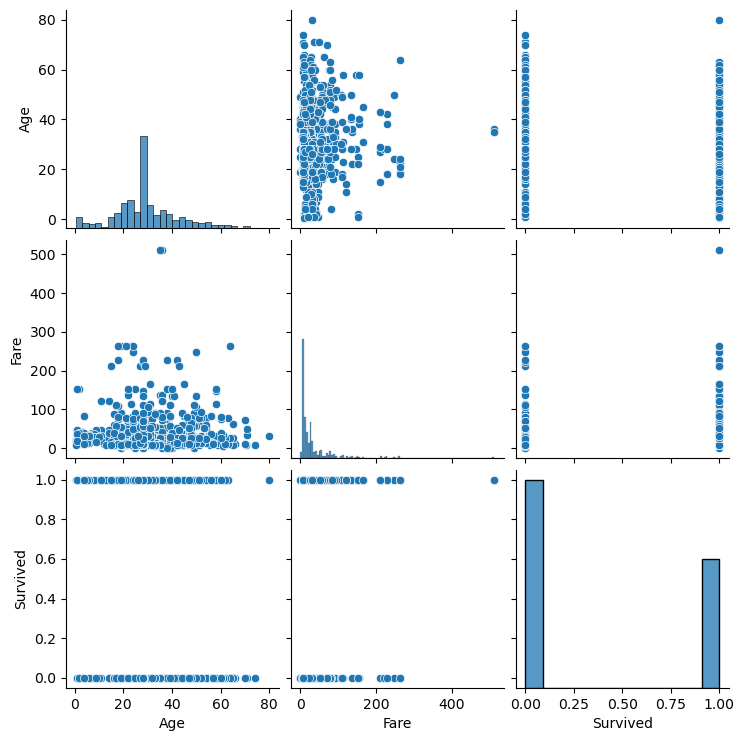

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

if all(col in numeric_df.columns for col in ['Age', 'Fare', 'Survived']):
    sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna())
    plt.show()
else:
    print("Some columns are not numeric or don't exist in the dataframe")

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


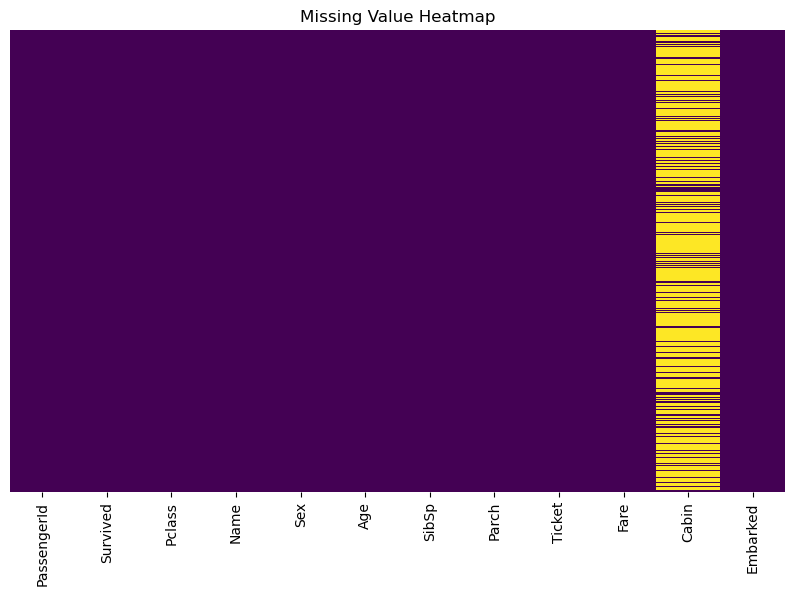


Percentage of missing values:
Cabin          77.27784
PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

Created 'HasCabin' feature from 687 missing Cabin values

Remaining missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


In [9]:
# Check missing values in the entire dataframe
print("Missing values in each column:")
print(df.isnull().sum())

# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Calculate percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

# Fill missing Age values with median
if 'Age' in df.columns and df['Age'].isnull().sum() > 0:
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)
    print(f"\nFilled {df['Age'].isnull().sum()} missing Age values with median: {median_age:.2f}")

# Drop rows with missing Embarked values
if 'Embarked' in df.columns and df['Embarked'].isnull().sum() > 0:
    missing_embarked = df['Embarked'].isnull().sum()
    df.dropna(subset=['Embarked'], inplace=True)
    print(f"\nDropped {missing_embarked} rows with missing Embarked values")

# Handle other common missing values in Titanic dataset
if 'Cabin' in df.columns and df['Cabin'].isnull().sum() > 0:
    # For Cabin, we might create a binary feature indicating if Cabin is known
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    print(f"\nCreated 'HasCabin' feature from {df['Cabin'].isnull().sum()} missing Cabin values")

# Check if all missing values are handled
print("\nRemaining missing values:")
print(df.isnull().sum())